In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))###

Using TensorFlow backend.


In [7]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
##model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [8]:
###
import numpy as np
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
X=np.load("X_train.npy")
y=np.load("Y_train.npy")
x_test=np.load("X_test.npy")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape,
X_test.shape,
X.shape)
###
print(y_train.shape,
y_test.shape,
y.shape)
'''
X_train=X
y_train=y
'''
x_test=np.load("X_test.npy")
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

(1635, 224, 224, 3) (545, 224, 224, 3) (2180, 224, 224, 3)
(1635,) (545,) (2180,)


In [9]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import CSVLogger

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=20)

validation_generator = validation_datagen.flow(X_test, y_test, batch_size=20)


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

#for history recovery
csv_logger = CSVLogger('training.log', separator=',', append=False)

history = model.fit_generator(
      train_generator,
      callbacks=[csv_logger],
      steps_per_epoch=81,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=27)

Epoch 1/20
81/81 [==============================] - 42s 516ms/step - loss: 1.0844 - acc: 0.5981 - val_loss: 0.9763 - val_acc: 0.6426
Epoch 2/20
81/81 [==============================] - 39s 484ms/step - loss: 0.9738 - acc: 0.6198 - val_loss: 0.9172 - val_acc: 0.6571
Epoch 3/20
81/81 [==============================] - 36s 449ms/step - loss: 0.9165 - acc: 0.6545 - val_loss: 0.8433 - val_acc: 0.6990
Epoch 4/20
81/81 [==============================] - 36s 450ms/step - loss: 0.8953 - acc: 0.6642 - val_loss: 0.8707 - val_acc: 0.6743
Epoch 5/20
81/81 [==============================] - 37s 451ms/step - loss: 0.8537 - acc: 0.6790 - val_loss: 0.7927 - val_acc: 0.7219
Epoch 6/20
81/81 [==============================] - 37s 451ms/step - loss: 0.8515 - acc: 0.6765 - val_loss: 0.7522 - val_acc: 0.7390
Epoch 7/20
81/81 [==============================] - 37s 452ms/step - loss: 0.8130 - acc: 0.6994 - val_loss: 0.8135 - val_acc: 0.6933
Epoch 8/20
81/81 [==============================] - 37s 451ms/step - 

In [16]:
x_test=np.load("X_test.npy")
x_test = x_test.astype('float32') / 255
yfit = model.predict_classes(x_test)
#print(yfit.shape)
for i in range(len(yfit)):
    print(yfit[i])


3
0
2
3
3
0
2
0
2
0
3
0
0
2
0
2
3
0
0
0
2
0
3
0
0
3
2
3
0
0
0
0
0
3
3
0
0
2
0
3
3
0
0
3
0
2
0
2
3
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
2
0
3
3
0
3
3
0
2
0
2
0
0
2
3
0
0
0
0
2
2
2
0
0
0
0
3
0
2
2
0
2
3
3
0
2
2
2
0
0
2
0
2
2
0
3
2
2
2
0
0
2
2
0
0
0
2
2
2
3
2
2
2
0
2
2
0
0
0
0
2
3
2
3
1
0
2
2
3
0
0
3
0
2
0
0
3
0
0
2
0
0
3
0
2
0
2
2
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
2
0
3
0
0
0
0
0
2
0
2
0
3
0
3
0
2
3
0
0
2
2
3
0
3
2
0
1
0
3
2
2
2
0
0
0
0
0
0
0
3
3
3
0
3
0
2
2
0
0
3
0
0
0
3
3
2
0
3
2
2
2
0
0
0
2
2
2
2
3
3
0
3
0
0
0
0
3
3
0
0
3
0
3
2
0
0
3
2
3
3
0
1
0
3
2
2
0
0
0
0
0
0
3
0
3
3
2
2
2
3
3
0
3
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
3
2
0
0
0
0
0
0
0
3
0
0
3
0
3
0
2
0
0
2
0
2
0
0
2
0
2
0
0
0
2
2
2
0
0
0
2
2
2
2
0
3
2
0
3
0
2
0
0
0
3
3
0
0
0
3
3
0
0
3
0
0
0
0
0
2
2
3
0
0
0
0
0
0
2
3
0
2
0
2
2
3
3
0
3
3
3
3
3
0
0
2
2
2
2
0
0
3
0
0
0
0
2
3
0
3
0
2
0
0
0
2
2
0
2
0
2
0
0
3
0
3
0
3
0
3
3
3
0
0
0
2
0
0
0
2
0
2
2
0
0
3
0
3
2
3
2
2
0
0
0
2
3
0
0
2
2
2
2
0
1
3
0
3
3
2
2
0
3
2
0
2
2
0
2
0
0
0
0
2
0
0
3
3
0
0
0
0
3
3
3
3
2


In [17]:
model.save('cnn_copy2_D256_heavy.h5')

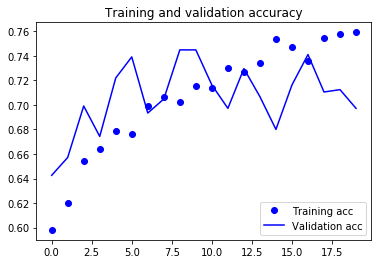

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


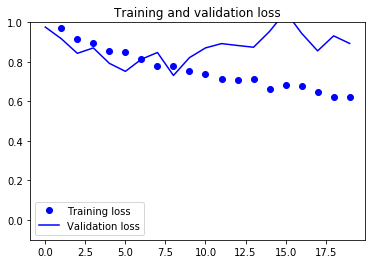

In [19]:
fig = plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([-0.1,1])
plt.legend()

In [20]:
x_test

array([[[[0.5686275 , 0.5058824 , 0.45490196],
         [0.56078434, 0.49803922, 0.44705883],
         [0.6313726 , 0.5647059 , 0.5254902 ],
         ...,
         [0.14509805, 0.08627451, 0.09803922],
         [0.14117648, 0.09411765, 0.10196079],
         [0.14117648, 0.09411765, 0.10196079]],

        [[0.58431375, 0.52156866, 0.47058824],
         [0.56078434, 0.49803922, 0.44705883],
         [0.60784316, 0.5411765 , 0.5019608 ],
         ...,
         [0.13725491, 0.09019608, 0.09803922],
         [0.14117648, 0.09411765, 0.10196079],
         [0.14117648, 0.09411765, 0.10196079]],

        [[0.6       , 0.5372549 , 0.4862745 ],
         [0.56078434, 0.49803922, 0.44705883],
         [0.59607846, 0.5294118 , 0.49019608],
         ...,
         [0.13725491, 0.09019608, 0.09803922],
         [0.14117648, 0.09411765, 0.10196079],
         [0.13725491, 0.09803922, 0.10196079]],

        ...,

        [[0.54901963, 0.47058824, 0.42745098],
         [0.53333336, 0.45490196, 0.4117647 ]